<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Copia_de_Copia_de_DescensoGradienteDomingo_10_SEP_23_RV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
 [[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]]
y:
 [[ 7.43692459]
 [ 9.74540971]
 [ 8.37761798]
 [ 7.39097411]
 [ 6.98579203]
 [ 8.20903901]
 [ 8.11960234]
 [ 9.14547974]
 [10.09504426]
 [ 5.44655337]]
theta0,theta1:
 [[-2.55298982]
 [ 0.6536186 ]]
y_pred:
 [-1.83556039 -1.61806768 -1.76503511 -1.84069825 -1.99917251 -1.70865301
 -1.98095954 -1.38723098 -1.29325402 -2.0517408 ]
y_pred:
 [ 9.9659155  12.26906854 10.71274746  9.91150778  8.23333454 11.30980936
  8.42620192 14.7135285  15.70870362  7.6766592 ]
y_pred:
 [ 6.90332375  8.70207451  7.4865957   6.8608316   5.55018686  7.95289799
  5.7008153  10.61118526 11.38841195  5.11542627]
y_pred:
 [ 7.68065921  9.64411471  8.31733914  7.63427622  6.20362075  8.82633896
  6.36804166 11.72803544 12.57642981  5.72905079]
y_pred:
 [ 7.46600235  9.421308    8.10003957  7.41981188  5.99509473  8.60692665
  6.15883317 11.49657886 12.34145174  5.522

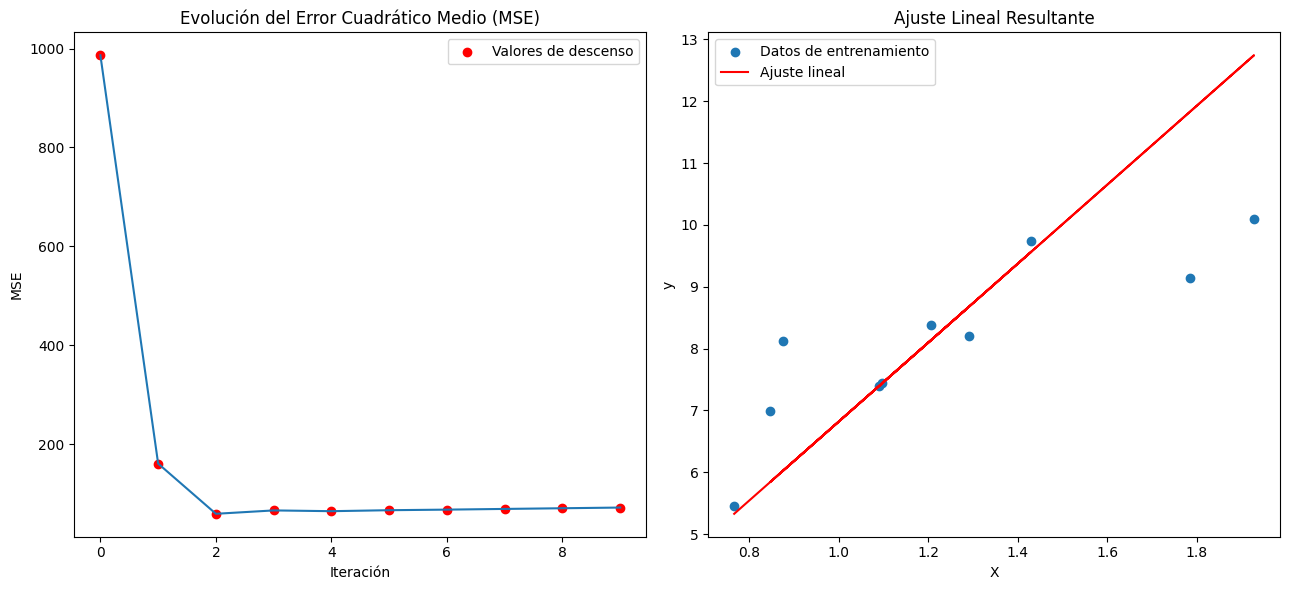

Parámetros finales del modelo:
Theta0: 0.4268743800776889
Theta1: 6.390987150112361


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)
print("X:\n",X)
print("y:\n",y)
# Parámetros iniciales
learning_rate = 0.05
num_iterations = 10
m = len(y)
theta = np.random.randn(2, 1)  # Inicialización aleatoria de los parámetros [theta0, theta1]
print("theta0,theta1:\n",theta)
# Listas para almacenar la evolución del error y los parámetros
error_history = []

# Listas para almacenar los valores de descenso
descent_values = []

# Descenso de gradiente tipo Batch
for iteration in range(num_iterations):
    # Calcular las predicciones del modelo
    y_pred = X.dot(theta[1]) + theta[0]
    print("y_pred:\n",y_pred)
    # Calcular el error cuadrático medio (MSE)
    #error = np.mean((y_pred - y) ** 2)
    error = np.sum((y - y_pred) ** 2) / m

    error_history.append(error)

    # Almacenar el valor de descenso
    descent_values.append([iteration, error])

    # Calcular los gradientes
    gradients = np.zeros((2, 1))
    for i in range(m):
        #gradients[0] += (y_pred[i] - y[i])
        #gradients[1] += (y_pred[i] - y[i]) * X[i]
        gradients[0] = (1/m) * np.sum(y_pred - y)#d(MSE)/d(theta0) = (1/m) * Σ(ŷi - yi)
        gradients[1] = (1/m) * np.sum((y_pred - y) * X)#d(MSE)/d(theta1) = (1/m) * Σ(ŷi - yi) * (-X)

    # Actualizar los parámetros theta usando el descenso de gradiente
    theta -= learning_rate * gradients
print("gradients:\n",gradients)
# Convertir los valores de descenso en un array numpy
descent_values = np.array(descent_values)
print("descent_values:\n",descent_values)
# Graficar la evolución del error con puntos de descenso
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.plot(error_history)
plt.scatter(descent_values[:, 0], descent_values[:, 1], color='red', label='Valores de descenso')
plt.title('Evolución del Error Cuadrático Medio (MSE)')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.legend()

# Graficar el ajuste lineal resultante
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, X.dot(theta[1]) + theta[0], color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal Resultante')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print("Parámetros finales del modelo:")
print(f"Theta0: {theta[0][0]}")
print(f"Theta1: {theta[1][0]}")


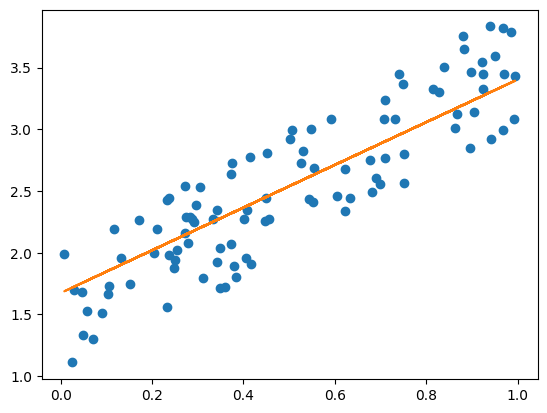

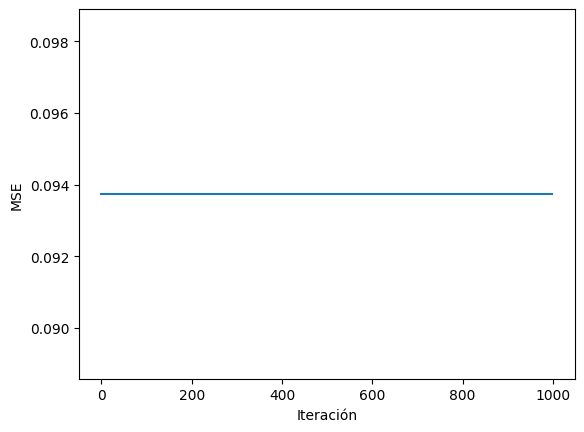

Parámetros finales del modelo:
Pendiente (w[0]): 1.7294467341300694
Término independiente (w[1]): 1.6741413793137707
Error cuadrático medio final: 0.09373754723727672


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos los datos de entrada
x = np.random.rand(100)
y = 2 * x + 1 + np.random.rand(100)

# Inicializamos los parámetros del modelo
w = np.array([0, 0])

# Definimos la función de error cuadrático
def mse(w, x, y):
    y_pred = w[0] * x + w[1]
    return np.mean((y - y_pred)**2)

# Definimos la función de gradiente
def gradient(w, x, y):
    y_pred = w[0] * x + w[1]
    gradient_0 = -2 * np.mean((y - y_pred) * x)
    gradient_1 = -2 * np.mean(y - y_pred)
    return np.array([gradient_0, gradient_1])

# Realizamos el descenso de gradiente
learning_rate = 0.01
num_iterations = 1000

for i in range(num_iterations):
    w = w - learning_rate * gradient(w, x, y)

# Calculamos el error cuadrático final
mse_final = mse(w, x, y)

# Graficamos el ajuste lineal
plt.plot(x, y, 'o')
plt.plot(x, w[0] * x + w[1])
plt.show()

# Graficamos la evolución del error cuadrático
plt.plot([i for i in range(num_iterations)], [mse(w, x, y) for i in range(num_iterations)])
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.show()

print("Parámetros finales del modelo:")
print(f"Pendiente (w[0]): {w[0]}")
print(f"Término independiente (w[1]): {w[1]}")
print(f"Error cuadrático medio final: {mse_final}")


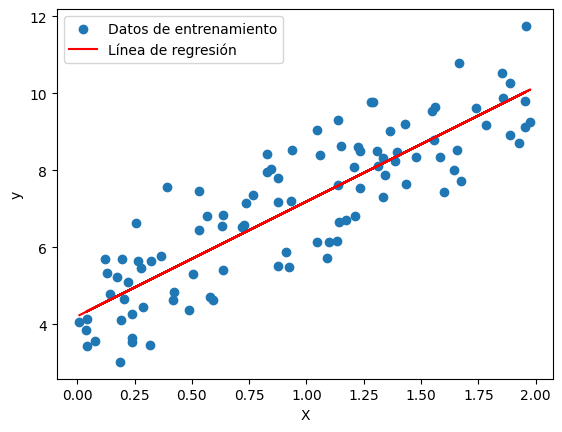

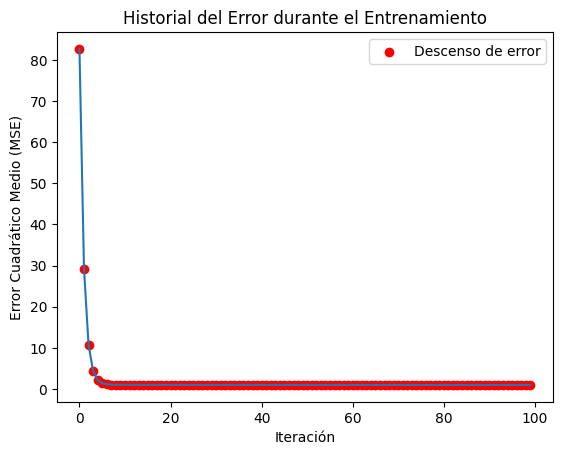

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Inicializar parámetros del modelo (theta0 y theta1)
theta0 = np.random.randn()
theta1 = np.random.randn()

# Hiperparámetros del descenso de gradiente
learning_rate = 0.1
num_iterations = 100

# Listas para almacenar el historial de errores y parámetros
error_history = []
theta0_history = []
theta1_history = []

# Descenso de gradiente
m = len(X)
for iteration in range(num_iterations):
    # Calcular las predicciones del modelo
    y_pred = theta0 + theta1 * X

    # Calcular el error cuadrático medio (MSE)
    error = np.mean((y_pred - y) ** 2)
    error_history.append(error)

    # Calcular los gradientes del MSE
    gradient_theta0 = (2 / m) * np.sum(y_pred - y)
    gradient_theta1 = (2 / m) * np.sum((y_pred - y) * X)

    # Actualizar los parámetros theta usando el descenso de gradiente
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1

    # Almacenar los valores de los parámetros en el historial
    theta0_history.append(theta0)
    theta1_history.append(theta1)

# Graficar los datos y la línea de regresión resultante
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, theta0 + theta1 * X, 'r', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Graficar el historial del error con puntos rojos
plt.plot(error_history)
plt.scatter(range(num_iterations), error_history, c='red', marker='o', label='Descenso de error')
plt.xlabel('Iteración')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Historial del Error durante el Entrenamiento')
plt.legend()
plt.show()


X:
 [[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]]
y:
 [[ 7.43692459]
 [ 9.74540971]
 [ 8.37761798]
 [ 7.39097411]
 [ 6.98579203]
 [ 8.20903901]
 [ 8.11960234]
 [ 9.14547974]
 [10.09504426]
 [ 5.44655337]]
theta0,theta1:
 [[-2.55298982]
 [ 0.6536186 ]]
y_pred:
 [-1.83556039 -1.61806768 -1.76503511 -1.84069825 -1.99917251 -1.70865301
 -1.98095954 -1.38723098 -1.29325402 -2.0517408 ]
y_pred:
 [ 0.19185979  0.74411292  0.37093616  0.17881384 -0.2235808   0.51410047
 -0.1773348   1.33024882  1.56887324 -0.35706116]
y_pred:
 [2.0519871  2.92542115 2.33521121 2.03135384 1.39493341 2.56163741
 1.46807529 3.8524436  4.22984789 1.18382317]
y_pred:
 [3.6174916  4.80505571 4.0025771  3.5894376  2.72412893 4.31043735
 2.82357624 6.06548125 6.57861877 2.43709301]
y_pred:
 [4.63390929 5.99697427 5.07590358 4.60170941 3.60852349 5.42926011
 3.72266735 7.44366831 8.03263844 3.27906876]
y_pred:
 [5.25191391 6.

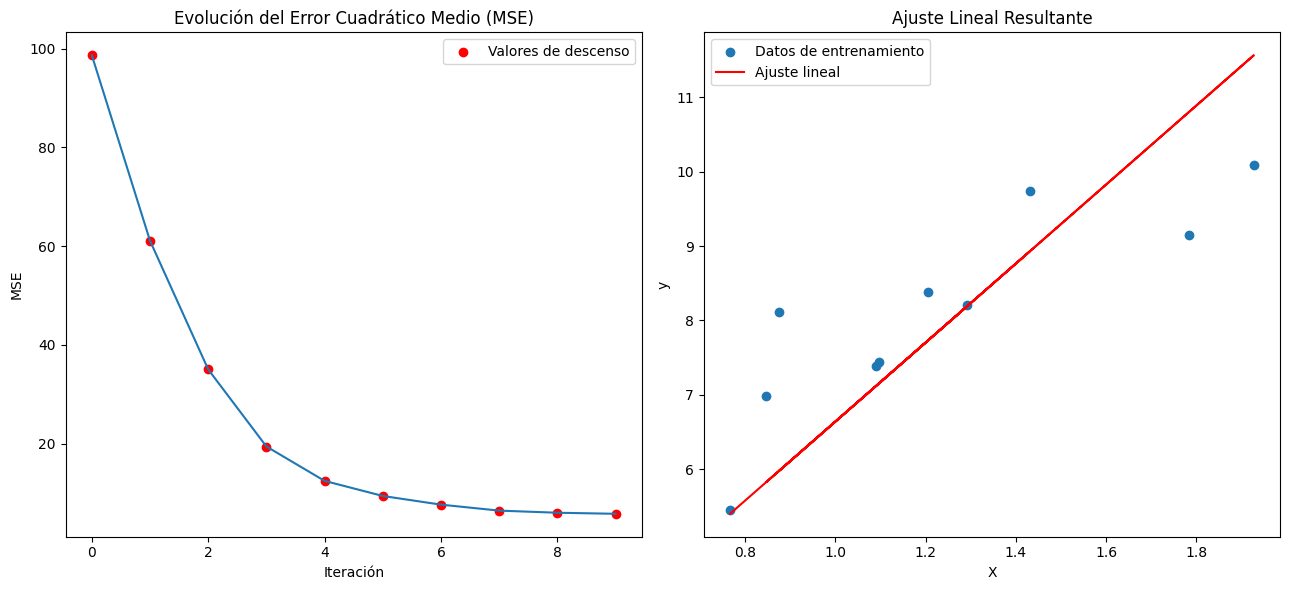

Parámetros finales del modelo:
Theta0: 1.323418927904004
Theta1: 5.31543899243518


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)
print("X:\n", X)
print("y:\n", y)

# Parámetros iniciales
learning_rate = 0.05
num_iterations = 10
m = len(y)
theta = np.random.randn(2, 1)  # Inicialización aleatoria de los parámetros [theta0, theta1]
print("theta0,theta1:\n", theta)

# Listas para almacenar la evolución del error y los parámetros
error_history = []

# Listas para almacenar los valores de descenso
descent_values = []

# Descenso de gradiente tipo Batch
for iteration in range(num_iterations):
    # Calcular las predicciones del modelo
    y_pred = X.dot(theta[1]) + theta[0]
    print("y_pred:\n", y_pred)

    # Calcular el error cuadrático medio (MSE)
    error = np.mean((y_pred - y) ** 2)
    error_history.append(error)

    # Almacenar el valor de descenso
    descent_values.append([iteration, error])

    # Calcular los gradientes utilizando un solo ejemplo (índice 10)
    random_example_index = np.random.randint(0, m)
    gradient_theta0 = 2 * (y_pred[random_example_index] - y[random_example_index])
    gradient_theta1 = 2 * (y_pred[random_example_index] - y[random_example_index]) * X[random_example_index]

    # Actualizar los parámetros theta usando el descenso de gradiente
    theta[0] -= learning_rate * gradient_theta0
    theta[1] -= learning_rate * gradient_theta1



# Convertir los valores de descenso en un array numpy
descent_values = np.array(descent_values)

# Graficar la evolución del error con puntos de descenso
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.plot(error_history)
plt.scatter(descent_values[:, 0], descent_values[:, 1], color='red', label='Valores de descenso')
plt.title('Evolución del Error Cuadrático Medio (MSE)')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.legend()

# Graficar el ajuste lineal resultante
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, X.dot(theta[1]) + theta[0], color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal Resultante')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print("Parámetros finales del modelo:")
print(f"Theta0: {theta[0][0]}")
print(f"Theta1: {theta[1][0]}")
